## Nomenclature ##

$a$ : Semi-major axis

$e$ : Eccentricity 

$i$ : Inclination Angle

$\Omega$ : Right ascension of ascending node 

$\omega$ : Amgle of periapsis 

$\nu$ : True anomaly

$\mu$ : Gravitational Constant of earth

$n$ : Mean motion

$H$ : Angular momentum of spacecraft

$E$ : Eccentric anomaly

$M$ : Mean anomaly

$\gamma$: Flight path angle

$S_p$ : Position vector in periapsis coordinate frame

$S$ : Position vector in inertial heliocentric coordinate frame

$v_p$ : Velocity in periapsis coordinate frame

$v$ : Velocity in inertial heliocentric coordinate frame

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Unit conversions ##

The following variables are defined in order to convert the units without confusion, throughout the code.

In [2]:
##Unit Conversions##

deg_to_radian = np.pi/180;
radian_to_deg = 180/np.pi;
km_to_m = 1000;
m_to_km = 0.001;

## Given Data ##

$$a = 25000 km$$

$$e = 0.1$$

$$i = 40^{\circ}$$

$$\Omega = 250^{\circ}$$

$$\omega = 120^{\circ}$$

$$\nu_0 = 0^{\circ}$$

$$\mu = 398600 km^3/s^2$$

$$n = \sqrt{\frac{\mu}{a^3}}$$

$$H = \sqrt{\mu.a.(1-e^2)}$$

In [3]:
##Given Data##

w = 120*deg_to_radian;
i = 40*deg_to_radian;
a = 25000*km_to_m;
omega = 250*deg_to_radian;
e = 0.1;
nu_0 = 0.0*deg_to_radian;
mu = 398600*(km_to_m**3);
n = np.sqrt(mu/(a**3));
H = np.sqrt(mu*a*(1-(e**2)));

## Finding Eccentric and Mean Anomalies at t = 0 ##

The eccentric anomaly at t=0 is found using the following relation:

$$\tan{\frac{E_0}{2}} = \sqrt{\frac{1-e}{1+e}}.\tan{\frac{\nu_0}{2}}$$

The mean anomaly at t=0 is calculated using the following equation:

$$M_0 = E_0 - e.\sin(E_0)$$

In [4]:
##Defining anomalies at t = 0##

t = np.arange(100000);
E_0 = 2*np.arctan(np.sqrt((1-e)/(1+e))*np.tan(nu_0/2));
M_0 = E_0-(e*np.sin(E_0));

## Finding Eccentric and Mean Anomalies at some t  ##

The mean anomaly at time t can be calculated as follows:

$$M = M_0 + n.t$$

With the value of M, E is calculated using Kepler Equation with the help of Newton-Rapson method. 

Once E is obtained, the following relation is used to find $\nu$:

$$\tan{\frac{\nu}{2}} = \sqrt{\frac{1+e}{1-e}}.\tan{\frac{E}{2}}$$

In [5]:
##Finding anomalies at t = t##

M = M_0+(n*t);
E = np.zeros(np.size(M,0));
fE = E-(e*np.sin(E))-M;
fdotE = 1-(e*np.cos(E));
epsilon = 0.00000001;
for j in range(0,np.size(E,0)):
    while fE[j]>epsilon or fE[j]<(-1*epsilon):
        E[j] = E[j]-(fE[j]/fdotE[j]);
        fE[j] = E[j]-(e*np.sin(E[j]))-M[j];
        fdotE[j] = 1-(e*np.cos(E[j]));
nu = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2));

## Converting from orbital elements to state vector ##

The following relations were used:

$$r = \frac{a.(1-e^2)}{1 + e.cos(\nu)}$$

$$x_p = r.cos(\nu)$$

$$y_p = r.sin(\nu)$$

$$z_p = 0$$

$$S = R*S_p$$

where $R$ is the rotation matrix to convert from one coordinate frame to another. 

$$v_{x_p} = \frac{-\mu.sin(\nu)}{H}$$

$$v_{y_p} = \frac{\mu.(e+cos(\nu))}{H}$$

$$v_{z_p} = 0$$

Similarly,

$$v = R*v_{p}$$

$$Speed = \sqrt{v_x^2+v_y^2+v_z^2}$$

$$\tan\gamma = \frac{e.sin(\nu)}{1 + e.cos(\nu)}$$

$$v_{transversal} = \frac{\mu.(1 + e.cos(\nu))}{H}$$

$$H = r.v_{transversal}$$

In [18]:
##Converting from orbital elements to state vector##

r = a*(1-(e**2))/(1+(e*np.cos(nu)));
s_p = np.zeros((3,np.size(nu)));
s_p[0,:] = r*np.cos(nu);
s_p[1,:] = r*np.sin(nu);
R_w = np.array([[np.cos(w),-np.sin(w),0],
                [np.sin(w),np.cos(w),0],[0,0,1]]);
R_omega = np.array([[np.cos(omega),
                     -np.sin(omega),0],
                    [np.sin(omega),
                     np.cos(omega),0],[0,0,1]]);
R_i = np.array([[1,0,0],[0,np.cos(i),-np.sin(i)],
                [0,np.sin(i),np.cos(i)]]);
R = np.dot(R_omega,np.dot(R_i,R_w));
s = np.dot(R,s_p);
v_p = np.zeros((3,np.size(nu)));
v_p[0,:] = -mu*np.sin(nu)/H;
v_p[1,:] = mu*(e+np.cos(nu))/H;
v = np.dot(R,v_p);
speed = np.sqrt(np.power(v[0,:],2)+np.power(v[1,:],2)+
                np.power(v[2,:],2));
gamma = np.arctan(e*np.sin(nu)/(1+(e*np.cos(nu))));
v_transversal = mu*(1+(e*np.cos(nu)))/H;
angular_momentum = r*v_transversal; 
print(R_i)

[[ 1.          0.          0.        ]
 [ 0.          0.76604444 -0.64278761]
 [ 0.          0.64278761  0.76604444]]


## Time vs. position components ##

The coordinates of the spacecraft were plotted with respect to time. The initial coordinates correspond to the coordinates of the periapsis. Every 39338.8114 seconds, the spacecraft reaches the same position. Thus the period of revolution is 39338.8114 seconds.

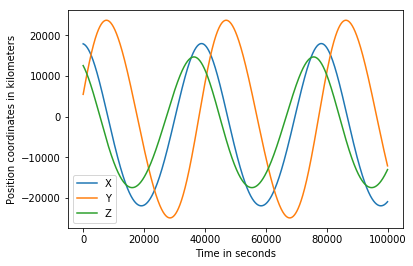

In [7]:
##Time versus position components##

plt.plot(t,s[0,:]*m_to_km);
plt.plot(t,s[1,:]*m_to_km);
plt.plot(t,s[2,:]*m_to_km);
plt.legend(['X','Y','Z']);
plt.xlabel('Time in seconds');
plt.ylabel('Position coordinates in kilometers');

## Time vs. velocity components ##

The different components of velocities of the spacecraft were plotted w.r.t. time. We can see that the trend followed by velocity is similar to that of position with a time offset.

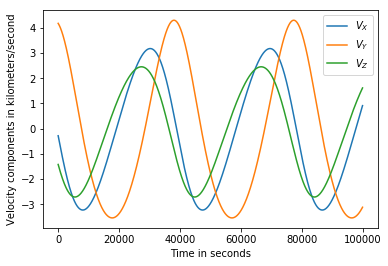

In [8]:
##Time versus velocity components##

plt.plot(t,v[0,:]*m_to_km);
plt.plot(t,v[1,:]*m_to_km);
plt.plot(t,v[2,:]*m_to_km);
plt.legend(['$V_X$','$V_Y$','$V_Z$']);
plt.xlabel('Time in seconds');
plt.ylabel('Velocity components in kilometers/second');

## Time vs. radial distance ##

We see that the spacecraft travels from minimum distance (perigee) to a maximum distance (apogee) within a time interval of 19669.4057 seconds.

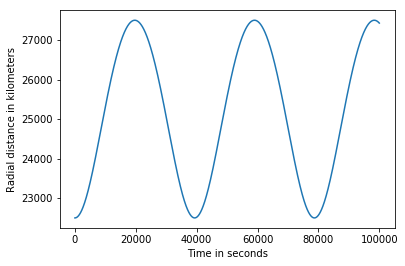

In [9]:
##Time versus radial distance##

plt.plot(t,r*m_to_km);
plt.xlabel('Time in seconds');
plt.ylabel('Radial distance in kilometers');

## Time vs. speed ##

We observe that there is 180 degree phase shift between radial distance and speed. When radial distance is minimum, speed is maximum, and vice-versa.

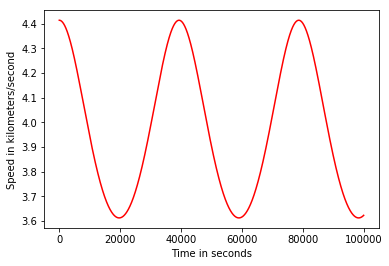

In [10]:
##Time versus velocity magnitude##

plt.plot(t,speed*m_to_km,color ='red');
plt.xlabel('Time in seconds');
plt.ylabel('Speed in kilometers/second');

## True anomaly versus Flight path angle ##

We can see the variation of flight path angle with true anomaly. Here true anomaly is varying from -180 to +180 degrees, while flight path angle ranges from approximately -6 to +6 degrees.

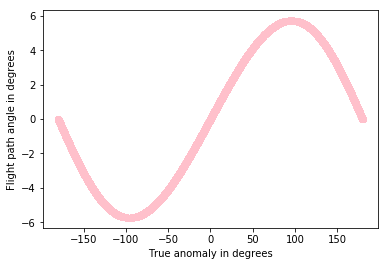

In [11]:
##True anomaly versus Flight path angle##
 
plt.scatter(nu*radian_to_deg,gamma*radian_to_deg,
            color = 'pink');
plt.xlabel('True anomaly in degrees');
plt.ylabel('Flight path angle in degrees');

## True anomaly versus Eccentric anomaly ##

As true anomaly varies from 180 to 180 degrees, the eccentric anomaly varies from -180 to 180 degrees. However, for ease of calculation of mean anomaly and time requirement, the eccentric anomaly is allowed to vary beyond 360 degrees.

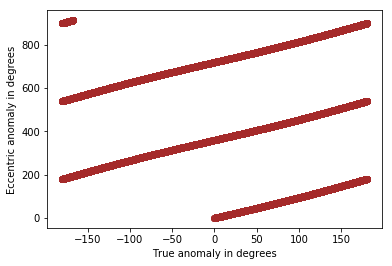

In [12]:
##True anomaly versus Eccentric anomaly##

plt.scatter(nu*radian_to_deg,E*radian_to_deg,
            color = 'brown');
plt.xlabel('True anomaly in degrees');
plt.ylabel('Eccentric anomaly in degrees');

## True anomaly versus Mean anomaly ##

As the true anomaly varies from 0 to 360 degrees, the mean anomaly also varies from 0 to 360 degrees. However, the mean anomaly is allowed to extend past 360 degrees for ease of calculation of time requirement.

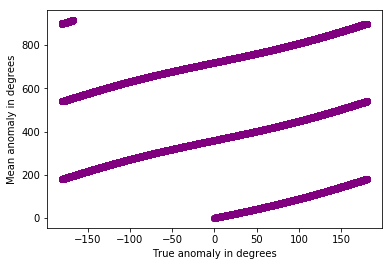

In [13]:
##True anomaly versus Mean anomaly##

plt.scatter(nu*radian_to_deg,M*radian_to_deg,
            color = 'purple');
plt.xlabel('True anomaly in degrees');
plt.ylabel('Mean anomaly in degrees');

## Tranversal Velocity versus horizontal velocity ##

The variation of transversal velocity with horizontal velocity was studied. It is not possible to get a unique value of horizontal velocity for a given value of transversal velocity.

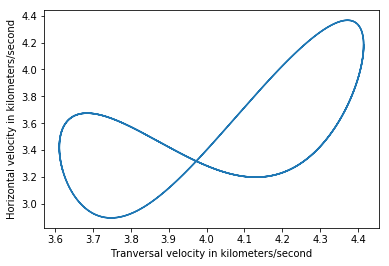

In [14]:
##Tranversal Velocity versus horizontal velocity##

v_horizontal = np.sqrt(np.power(v[0,:],2)+np.power(v[1,:],2));
plt.plot(v_transversal*m_to_km,v_horizontal*m_to_km);
plt.xlabel('Tranversal velocity in kilometers/second');
plt.ylabel('Horizontal velocity in kilometers/second');

## Time versus angular momentum ##

The angular momentum of the spacecraft was plotted w.r.t time and it was concluded that the angular momentum remains constant throughout the orbit.

Text(0, 0.5, 'Angular Momentum in ${km}^2/s$')

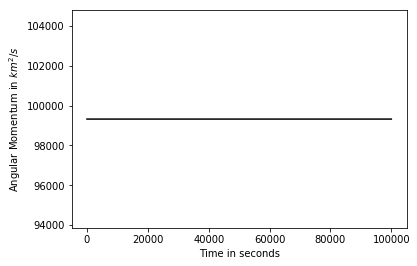

In [15]:
##Time versus angular momentum##

plt.plot(t,angular_momentum*(m_to_km**2),color = 'black');
plt.xlabel('Time in seconds');
plt.ylabel('Angular Momentum in ${km}^2/s$')

## State vectors at t = 1000 seconds ##

The state vectors at t = 0 and t = 1000 seconds was calculated.

$X_0 = 17874.34342388169$ km

$Y_0 = 5466.270977009236$ km

$Z_0 = 12525.083982594437$ km

$V_{x_0} = -0.2813090654798231$ km/s

$V_{y_0} = 4.1707403537568455$ km/s

$V_{z_0} = -1.418767501155213$ km/s

$X_{1000} = 17283.10651230645$ km

$Y_{1000} = 9517.4857966913$ km

$Z_{1000} = 10896.242208357635$ km

$V_{x_{1000}} = -0.8971854064162849$ km/s

$V_{y_{1000}} = 3.9083256001709117$ km/s

$V_{z_{1000}} = -1.8290732256783246$ km/s

In [16]:
##Find state vectors at t = 1000 seconds##

print('X_0 =',s[0,0]*m_to_km,'km');
print('Y_0 =',s[1,0]*m_to_km,'km');
print('Z_0 =',s[2,0]*m_to_km,'km');
print('Vx_0 =',v[0,0]*m_to_km,'km/s');
print('Vy_0 =',v[1,0]*m_to_km,'km/s');
print('Vz_0 =',v[2,0]*m_to_km,'km/s');

print('X_1000 =',s[0,1000]*m_to_km,'km');
print('Y_1000 =',s[1,1000]*m_to_km,'km');
print('Z_1000 =',s[2,1000]*m_to_km,'km');
print('Vx_1000 =',v[0,1000]*m_to_km,'km/s');
print('Vy_1000 =',v[1,1000]*m_to_km,'km/s');
print('Vz_1000 =',v[2,1000]*m_to_km,'km/s');

X_0 = 17874.34342388169 km
Y_0 = 5466.270977009236 km
Z_0 = 12525.083982594437 km
Vx_0 = -0.2813090654798231 km/s
Vy_0 = 4.1707403537568455 km/s
Vz_0 = -1.418767501155213 km/s
X_1000 = 17283.10651230645 km
Y_1000 = 9517.4857966913 km
Z_1000 = 10896.242208357635 km
Vx_1000 = -0.8971854064162849 km/s
Vy_1000 = 3.9083256001709117 km/s
Vz_1000 = -1.8290732256783246 km/s


## Conclusion ##

The motion of the spacecraft was studied and the required results were plotted and discussed.